In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-ratings/chocolate.csv


In [38]:
df = pd.read_csv('/kaggle/input/chocolate-ratings/chocolate.csv')
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   int64  
 1   company_manufacturer              2530 non-null   object 
 2   company_location                  2530 non-null   object 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   object 
 5   specific_bean_origin_or_bar_name  2530 non-null   object 
 6   cocoa_percent                     2530 non-null   object 
 7   ingredients                       2443 non-null   object 
 8   most_memorable_characteristics    2530 non-null   object 
 9   rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


In [40]:
df.describe()

,ref,review_date,rating
count,2530.000000,2530.000000,2530.000000
mean,1429.800791,2014.374308,3.196344
std,757.648556,3.968267,0.445321
min,5.000000,2006.000000,1.000000
25%,802.000000,2012.000000,3.000000
50%,1454.000000,2015.000000,3.250000
75%,2079.000000,2018.000000,3.500000
max,2712.000000,2021.000000,4.000000


In [41]:
df.nunique()

ref                                  630
company_manufacturer                 580
company_location                      67
review_date                           16
country_of_bean_origin                62
specific_bean_origin_or_bar_name    1605
cocoa_percent                         46
ingredients                           21
most_memorable_characteristics      2487
rating                                12
dtype: int64

In [42]:
df.isna().sum()

ref                                  0
company_manufacturer                 0
company_location                     0
review_date                          0
country_of_bean_origin               0
specific_bean_origin_or_bar_name     0
cocoa_percent                        0
ingredients                         87
most_memorable_characteristics       0
rating                               0
dtype: int64

In [43]:
df.duplicated().sum()
# ถ้ามีซ้ำ
#df.drop_duplicates()

0

# Data preprocessing

In [44]:
df[df.isnull().any(axis=1)]

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
85,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,NaN,"raisins, pungent",3.00
86,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,NaN,"few grits, blackcherry, licorice",3.50
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100%,NaN,"very nutty, very bitter",1.75
293,81,Bonnat,France,2006,Blend,One Hundred,100%,NaN,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100%,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...
2424,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100%,NaN,"bland, mild fruit, strong bitter",2.00
2425,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90%,NaN,"some fruit, strong bitter",2.00
2426,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75%,NaN,"cocoa,earthy,very astringent",3.00
2447,733,Whittakers,New Zealand,2011,Ghana,Ghana,72%,NaN,"sticky, dry, vanilla dominates",2.50


In [45]:
print("หาจำนวนของข้อมูล DataFrame [df]")
print(" ",len(df))
df = df.dropna()
print("ตรวจสอบว่ายังมีค่า Missing Value เหลืออยู่มั่ย")
print(df.isna().sum())
print("หาจำนวนข้อมููลอีกครั้งหลังจัดการกับ Missing Value")
print(" ",len(df))


หาจำนวนของข้อมูล DataFrame [df]
  2530
ตรวจสอบว่ายังมีค่า Missing Value เหลืออยู่มั่ย
ref                                 0
company_manufacturer                0
company_location                    0
review_date                         0
country_of_bean_origin              0
specific_bean_origin_or_bar_name    0
cocoa_percent                       0
ingredients                         0
most_memorable_characteristics      0
rating                              0
dtype: int64
หาจำนวนข้อมููลอีกครั้งหลังจัดการกับ Missing Value
  2443


In [46]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


# Visualization

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


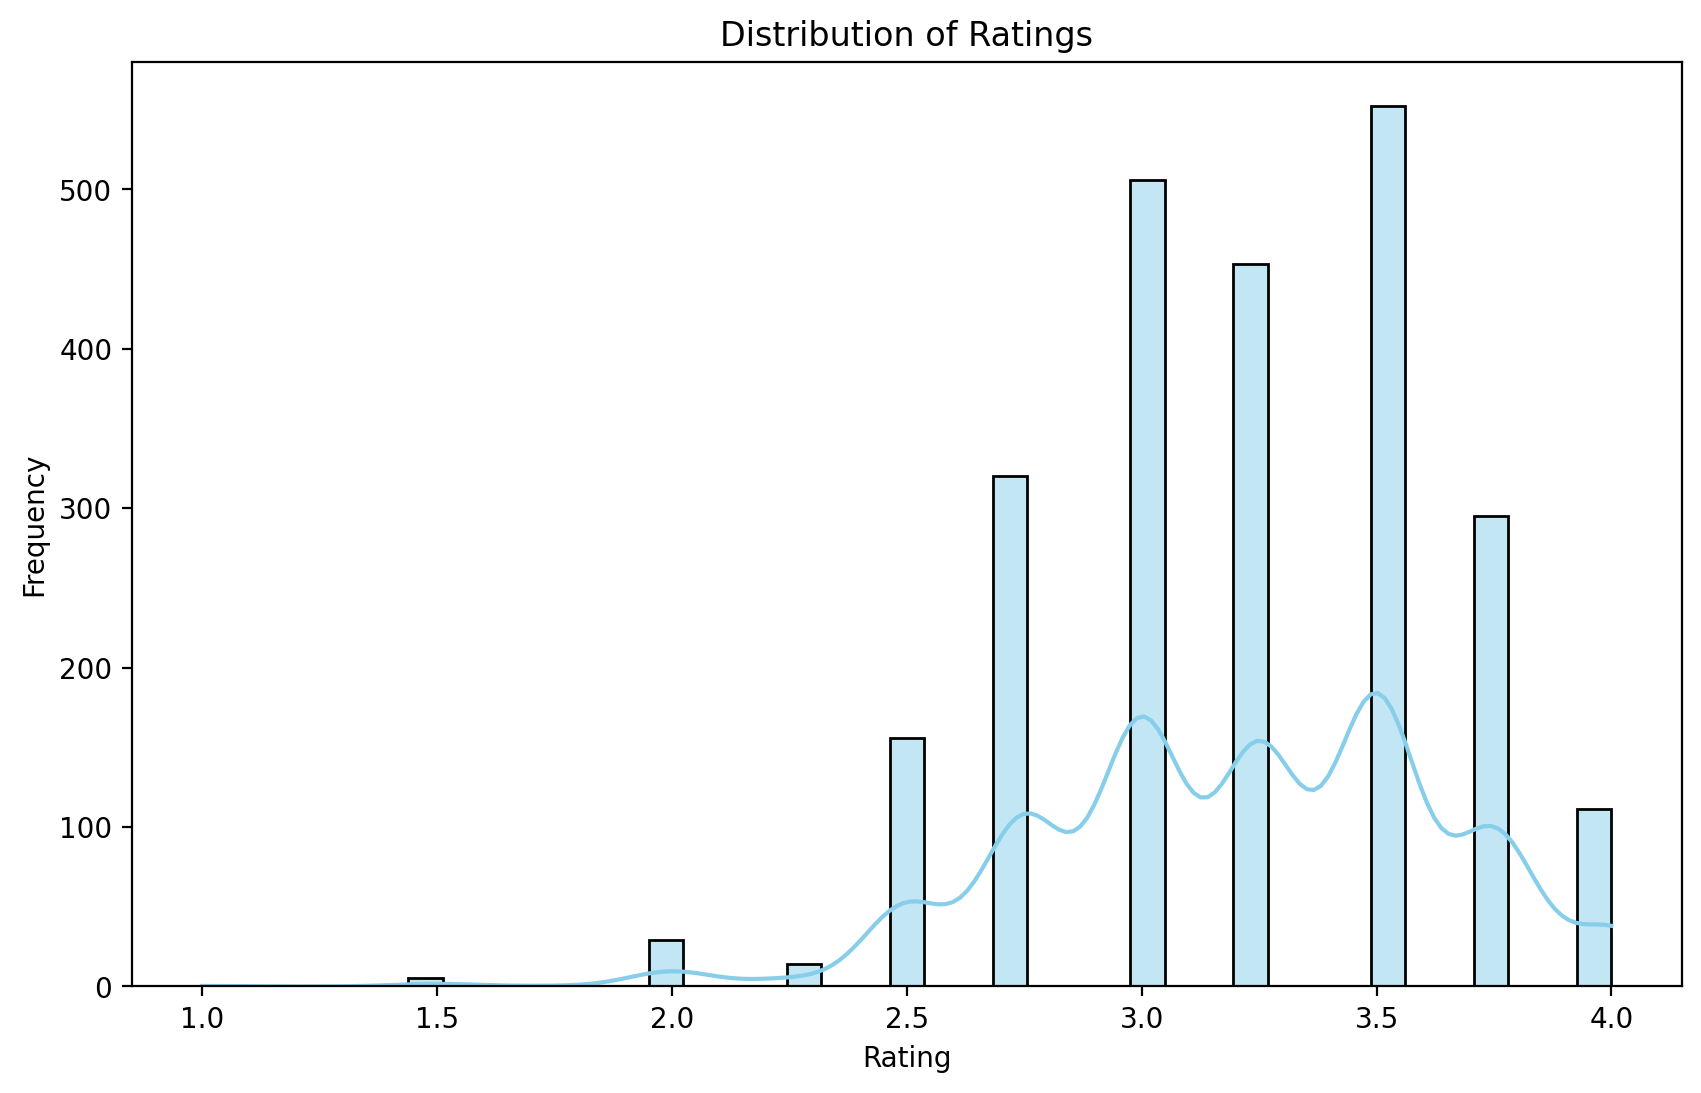

In [48]:
# 1. Plot distribution of 'rating'
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


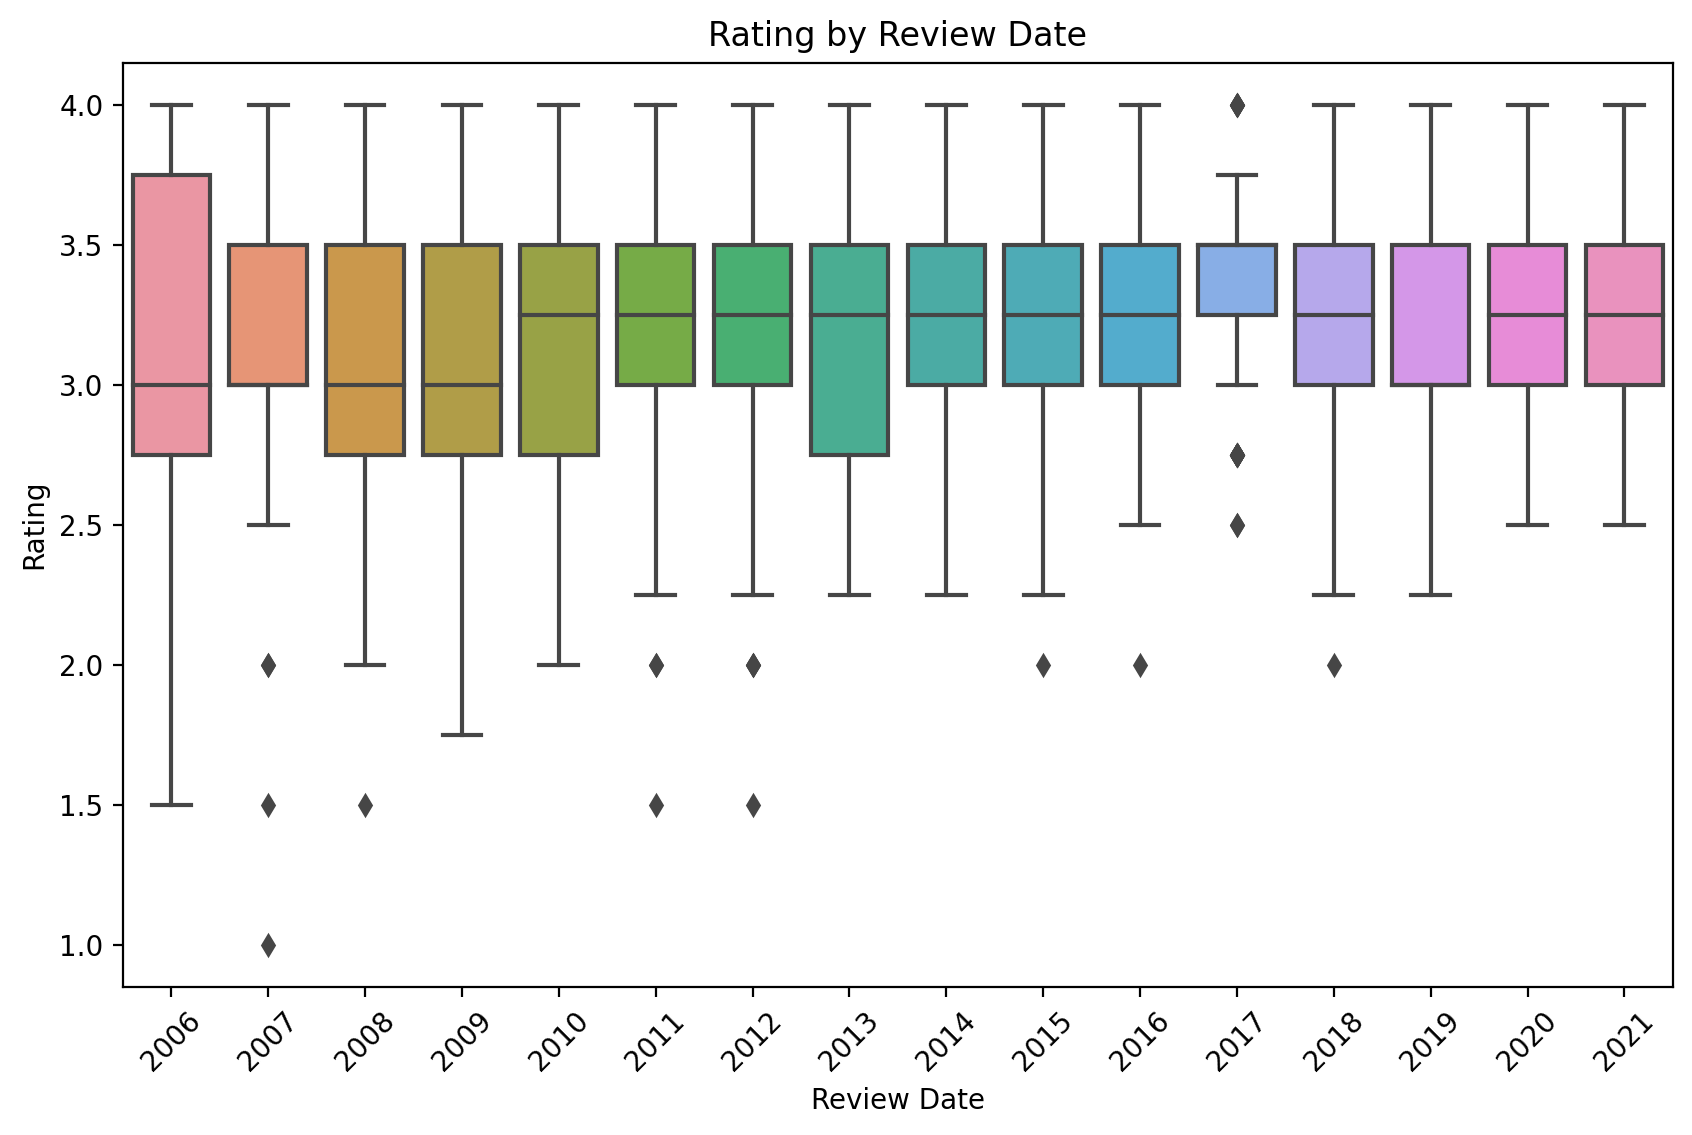

In [49]:
# 2. Explore relationship between 'rating' and 'review_date'
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_date', y='rating', data=df)
plt.title('Rating by Review Date')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

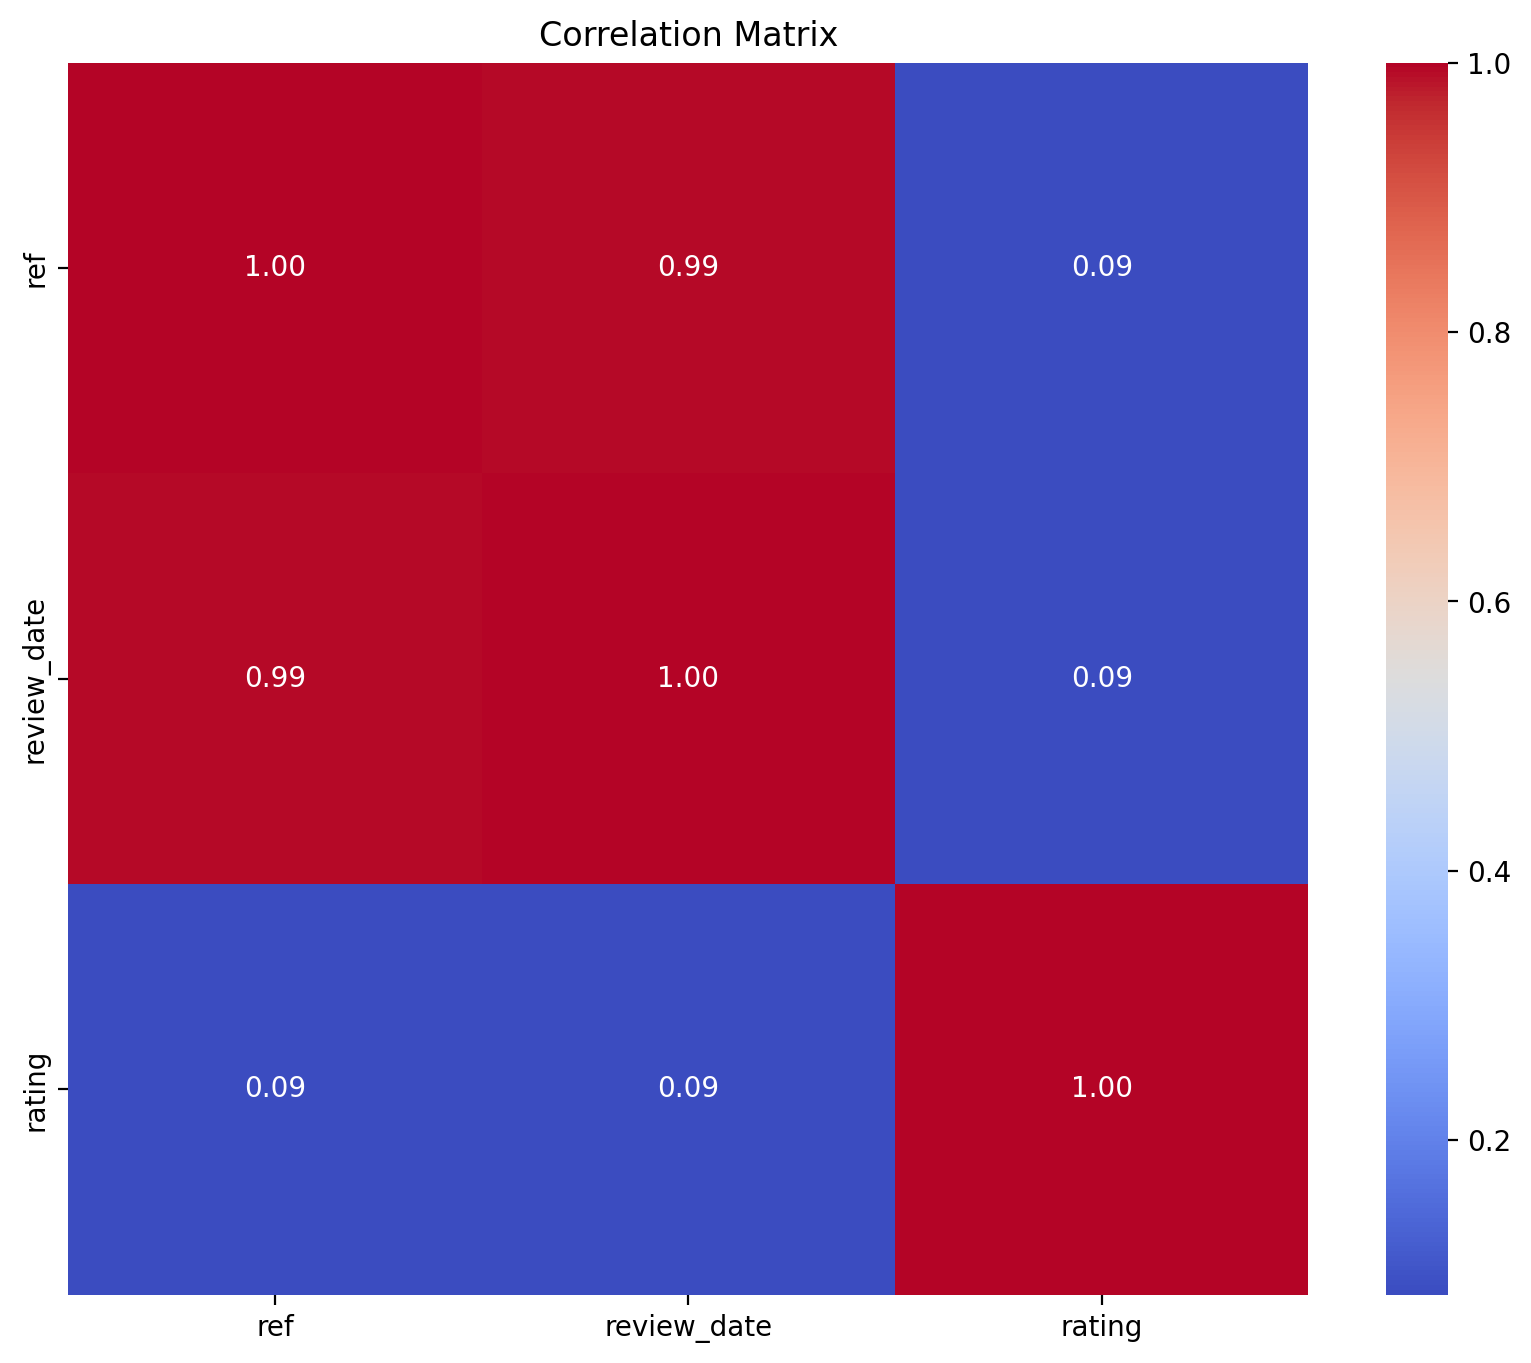

In [50]:
# 3. Correlation Matrix ใส่มาเผื่ออนาคตต้องใช้จะได้หัดไว้ก่อน
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


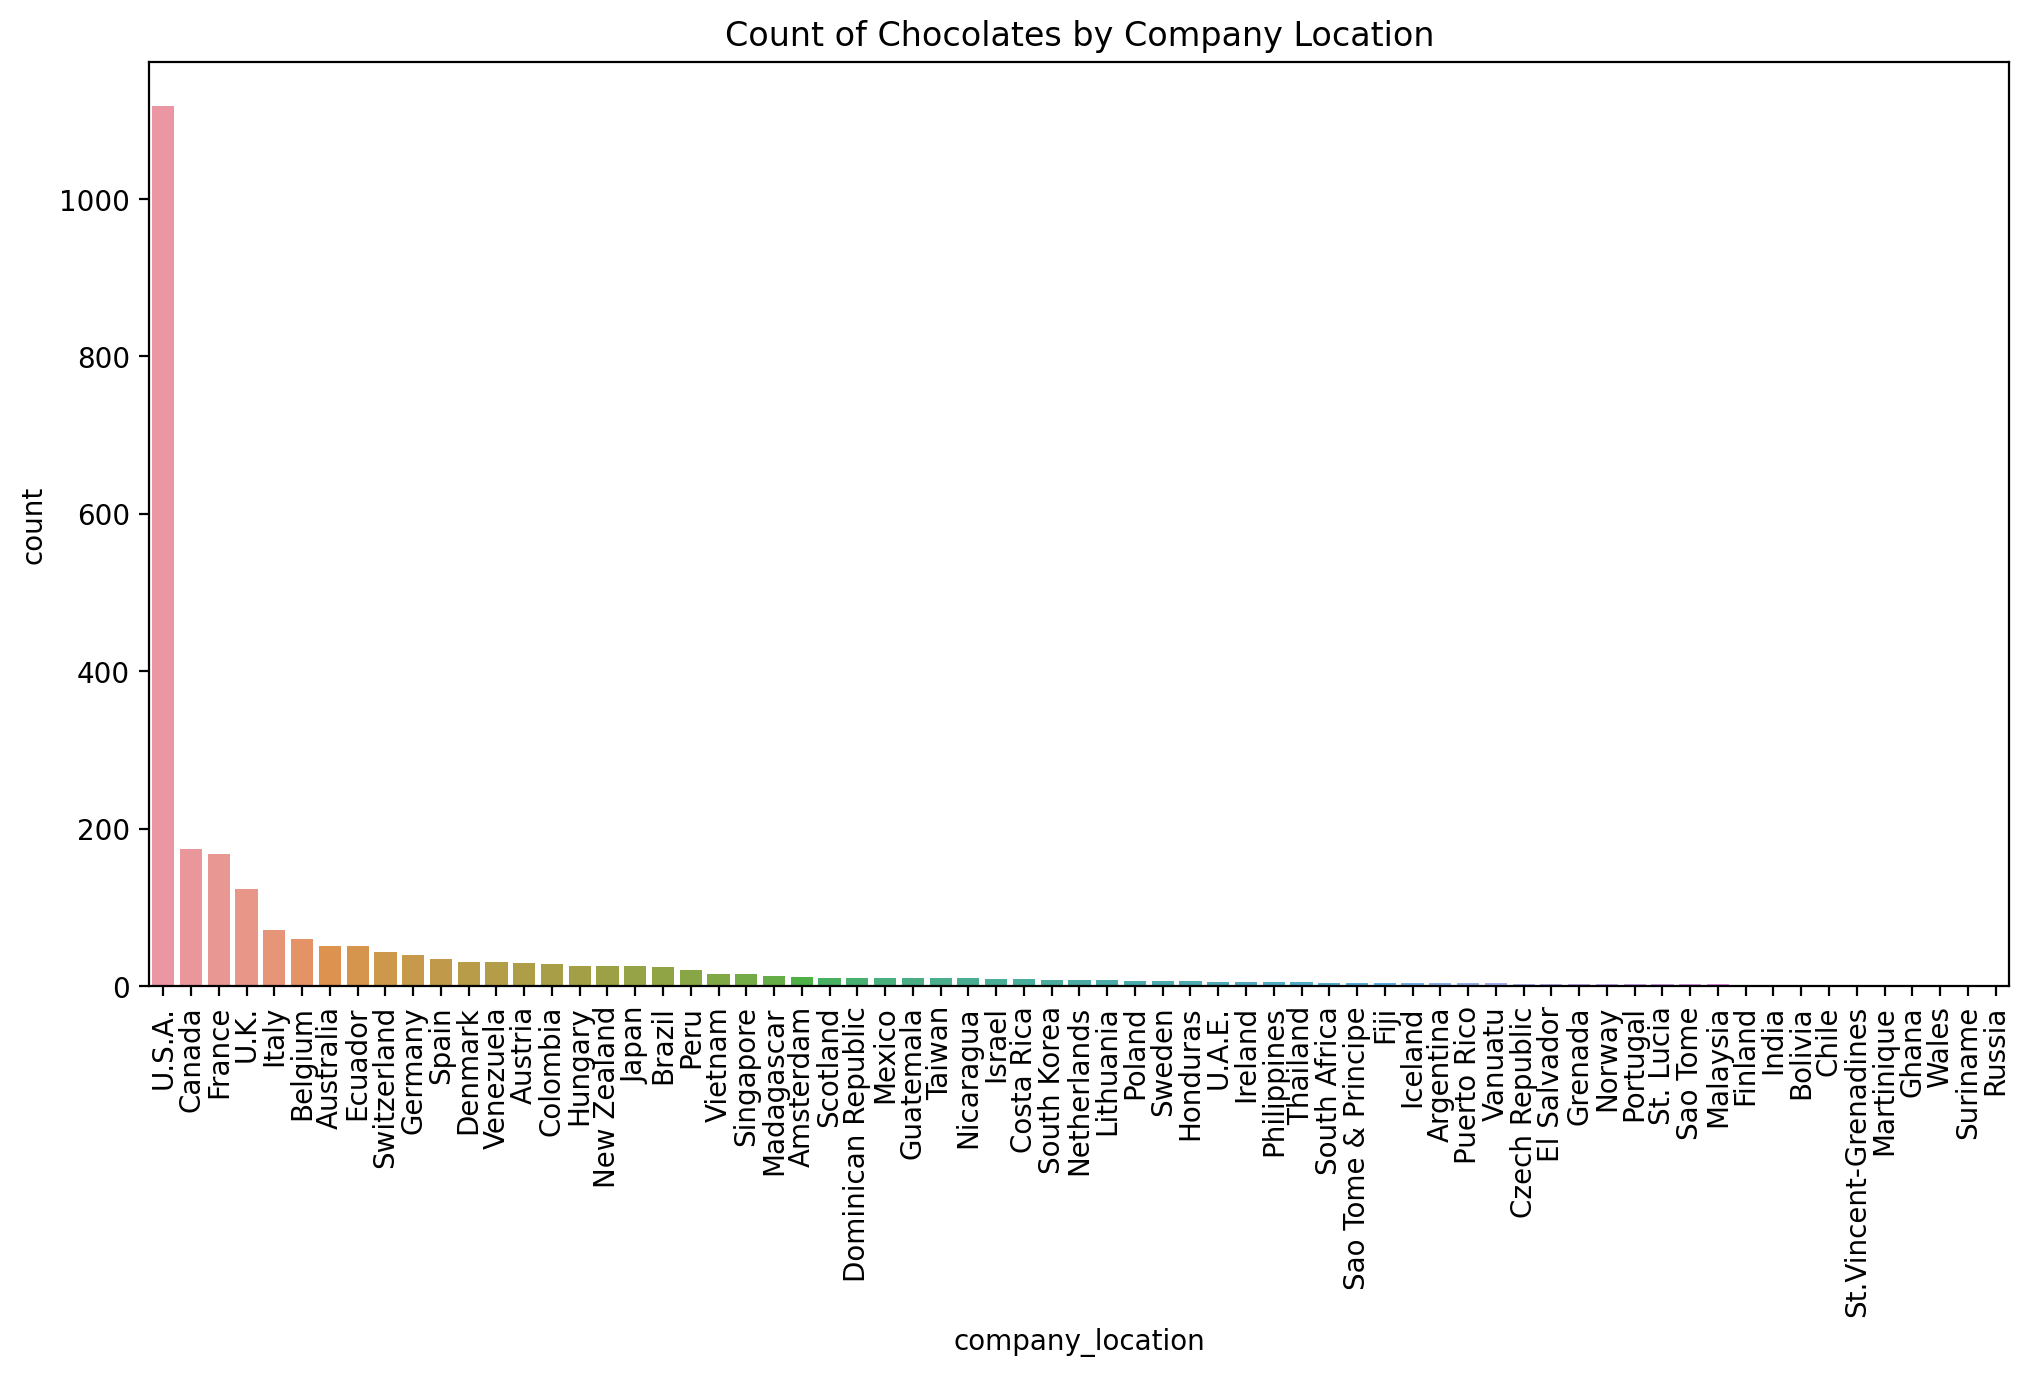

In [51]:
# 4. Categorical Variables Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='company_location', data=df, order=df['company_location'].value_counts().index)
plt.title('Count of Chocolates by Company Location')
plt.xticks(rotation=90)
plt.show()

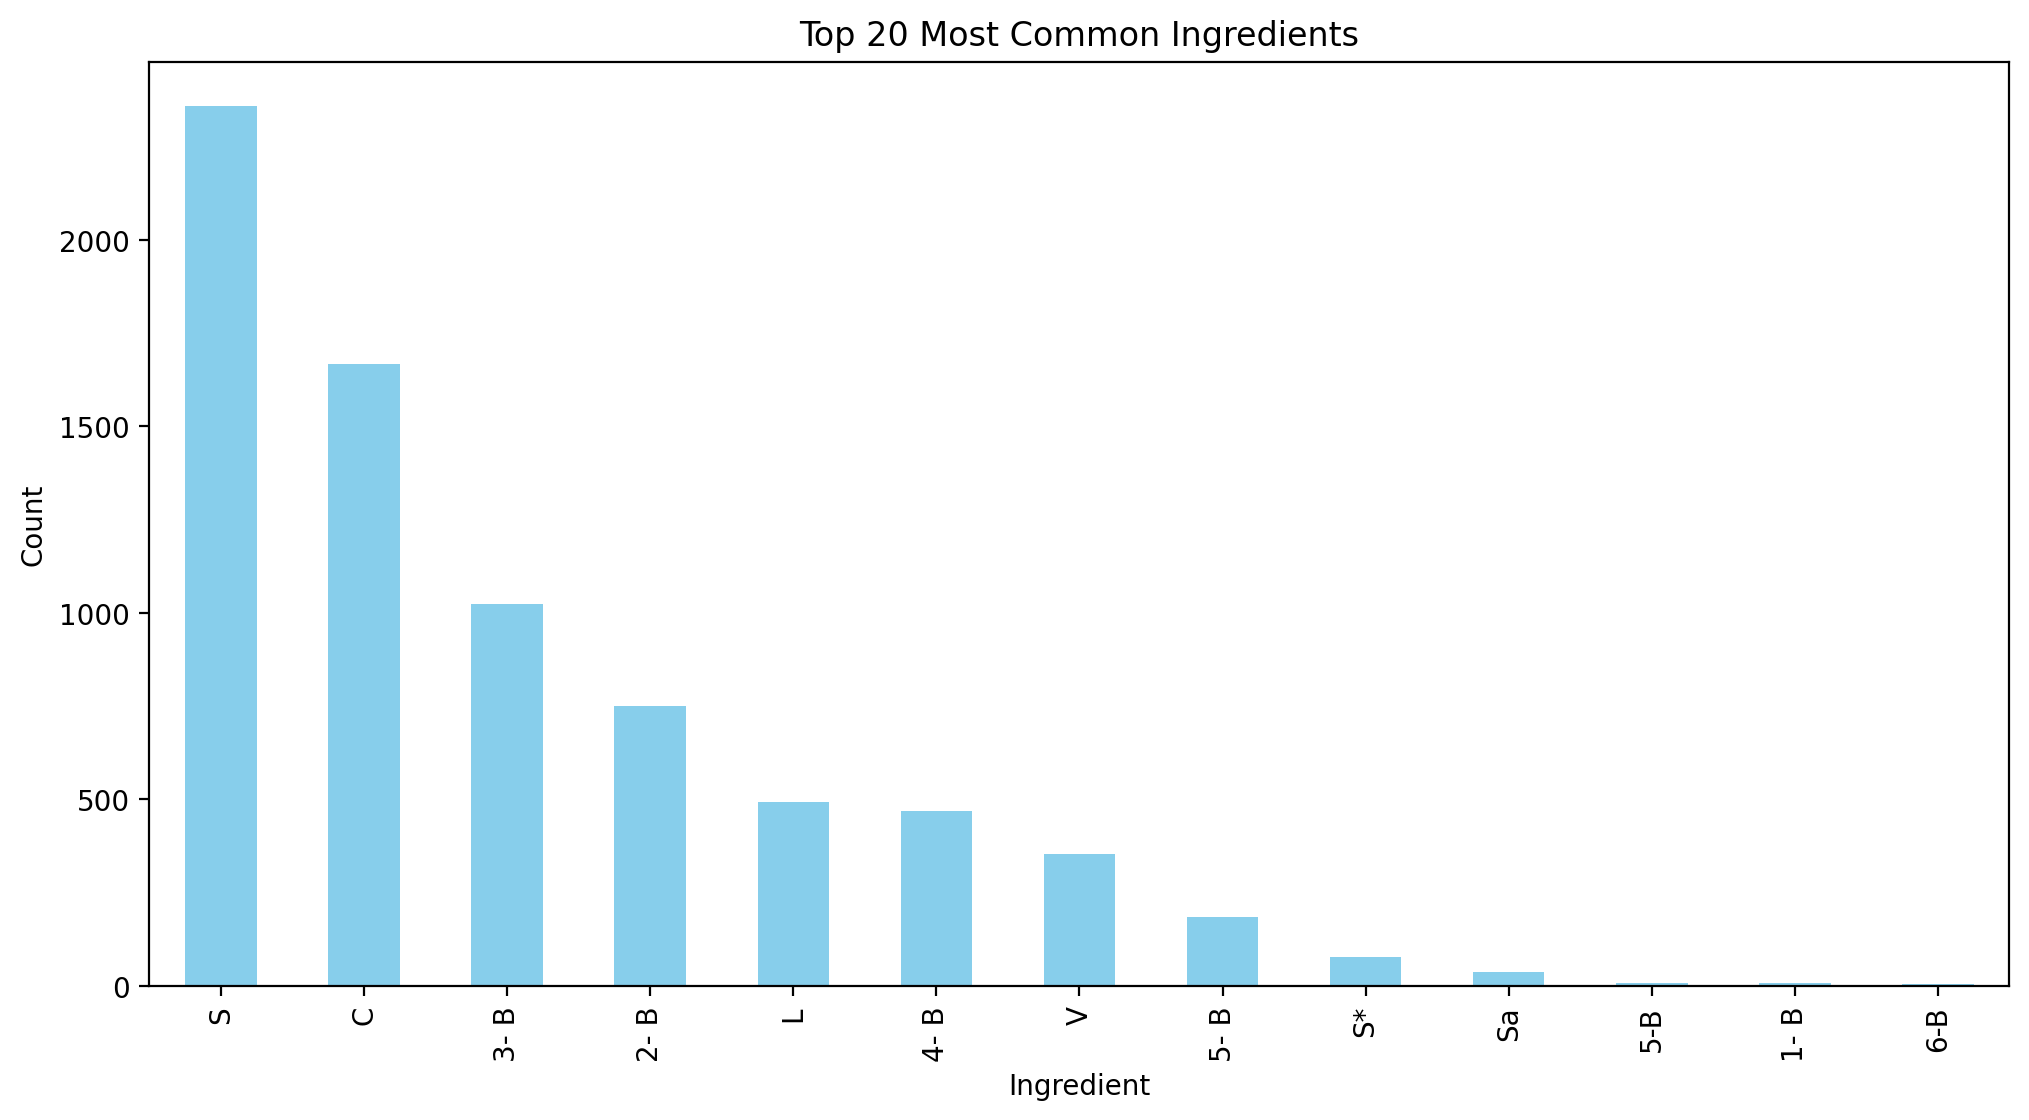

In [52]:
# 5. Ingredients Analysis
ingredients_count = df['ingredients'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(12, 6))
ingredients_count.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

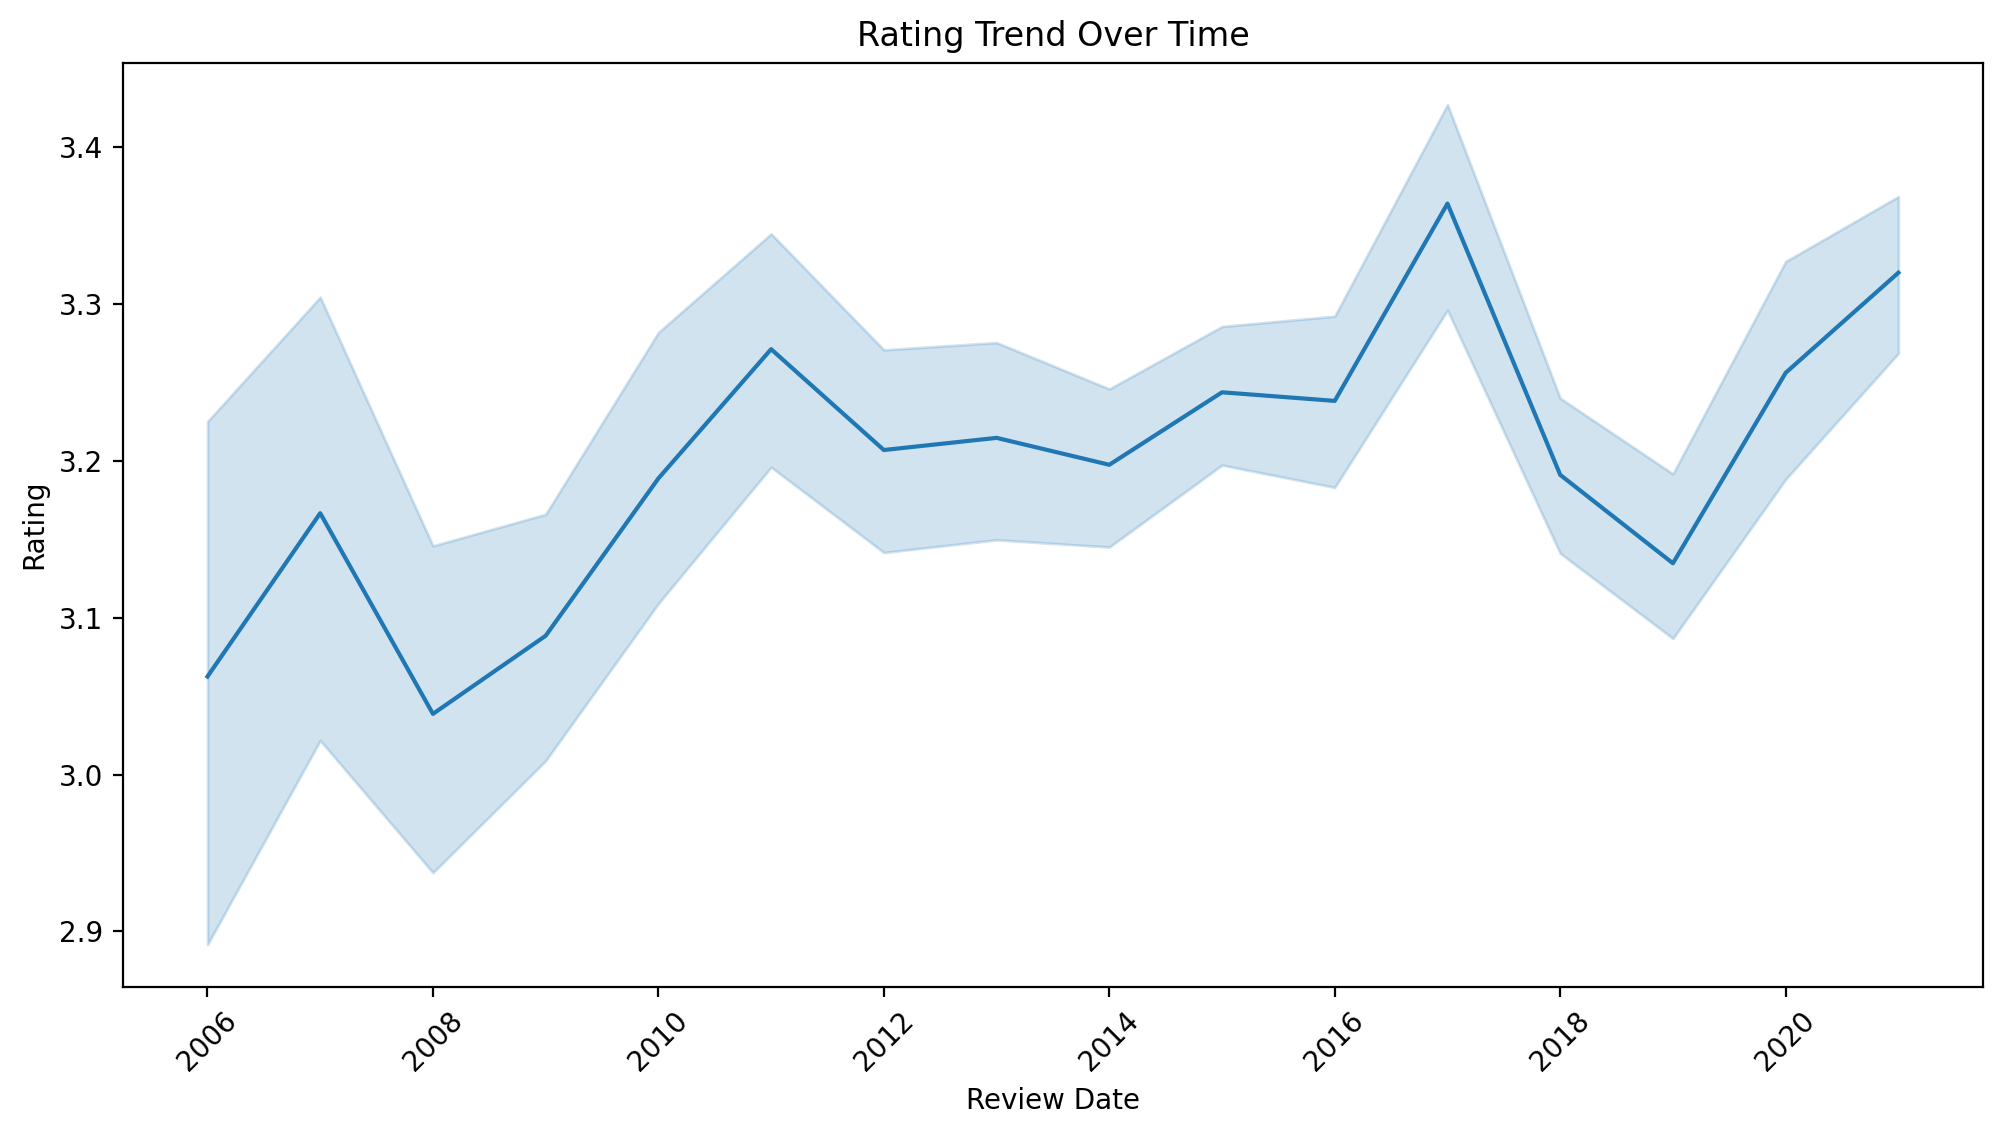

In [53]:
# 6. Temporal Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_date', y='rating', data=df)
plt.title('Rating Trend Over Time')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

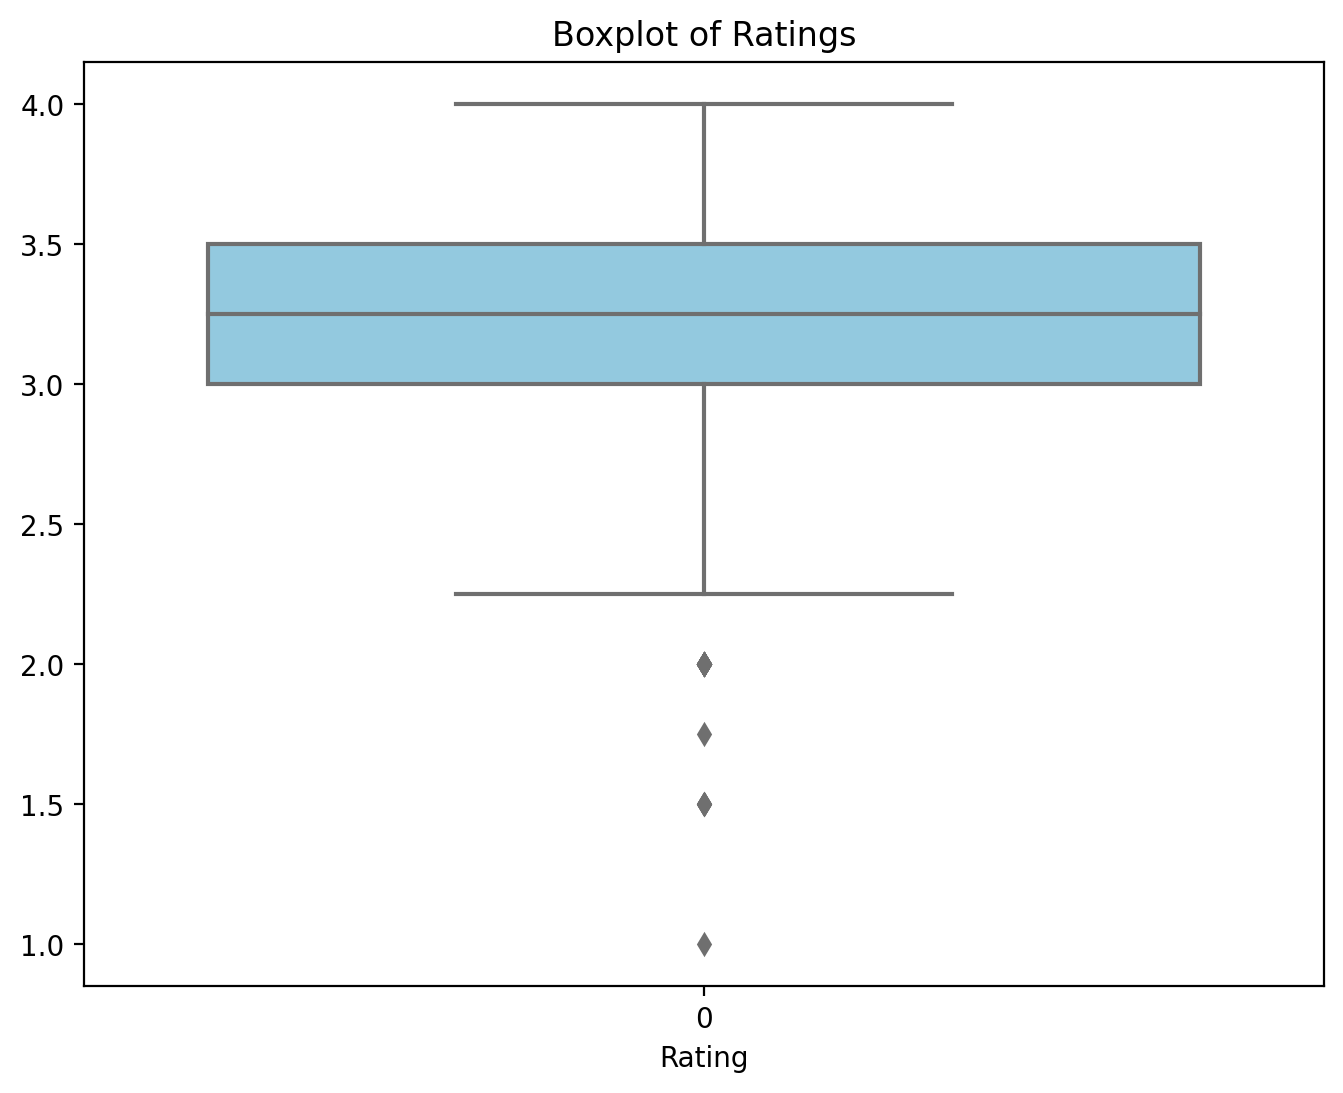

In [54]:
# 7. Outlier Detection
plt.figure(figsize=(8, 6))
sns.boxplot(df['rating'], color='skyblue')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

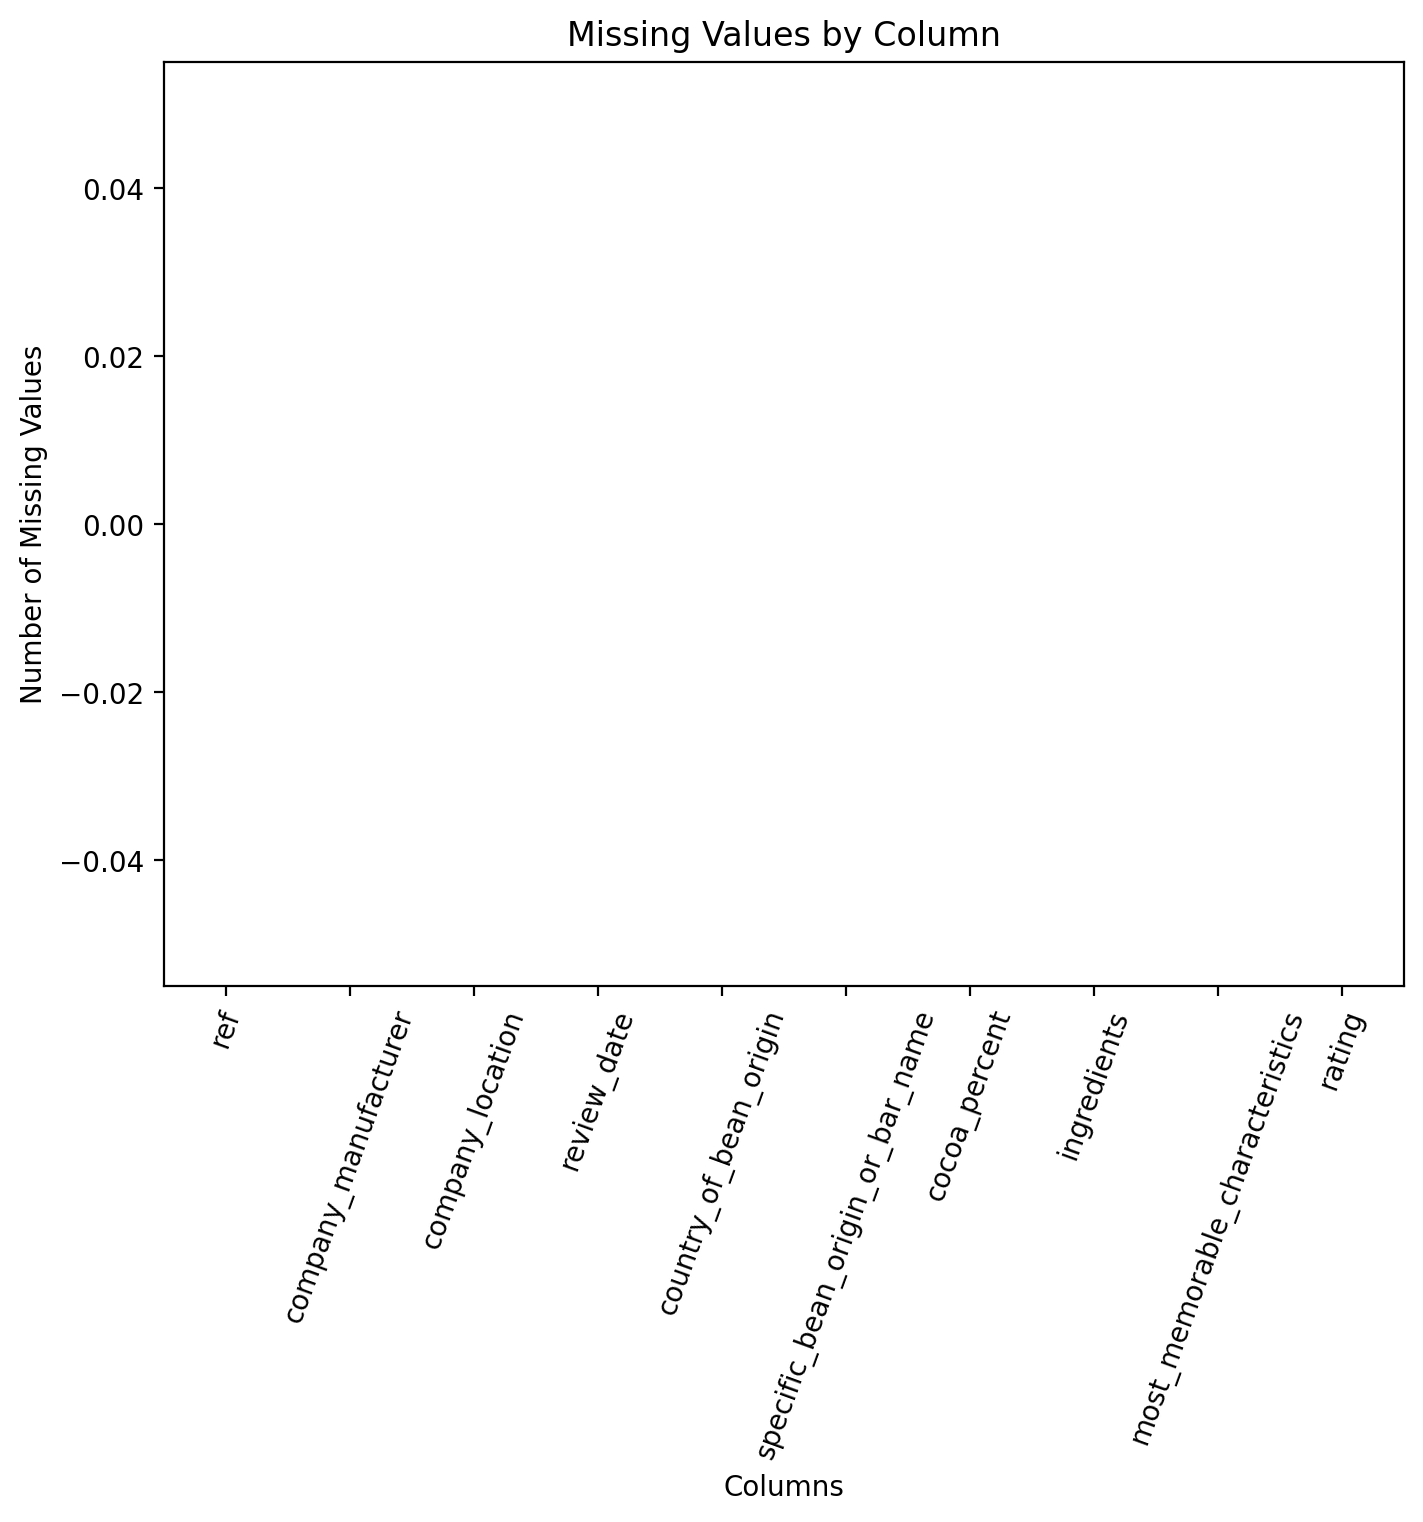

In [55]:
# 8. Missing Values Analysis
missing_values = df.isnull().sum()
plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=70)
plt.show()

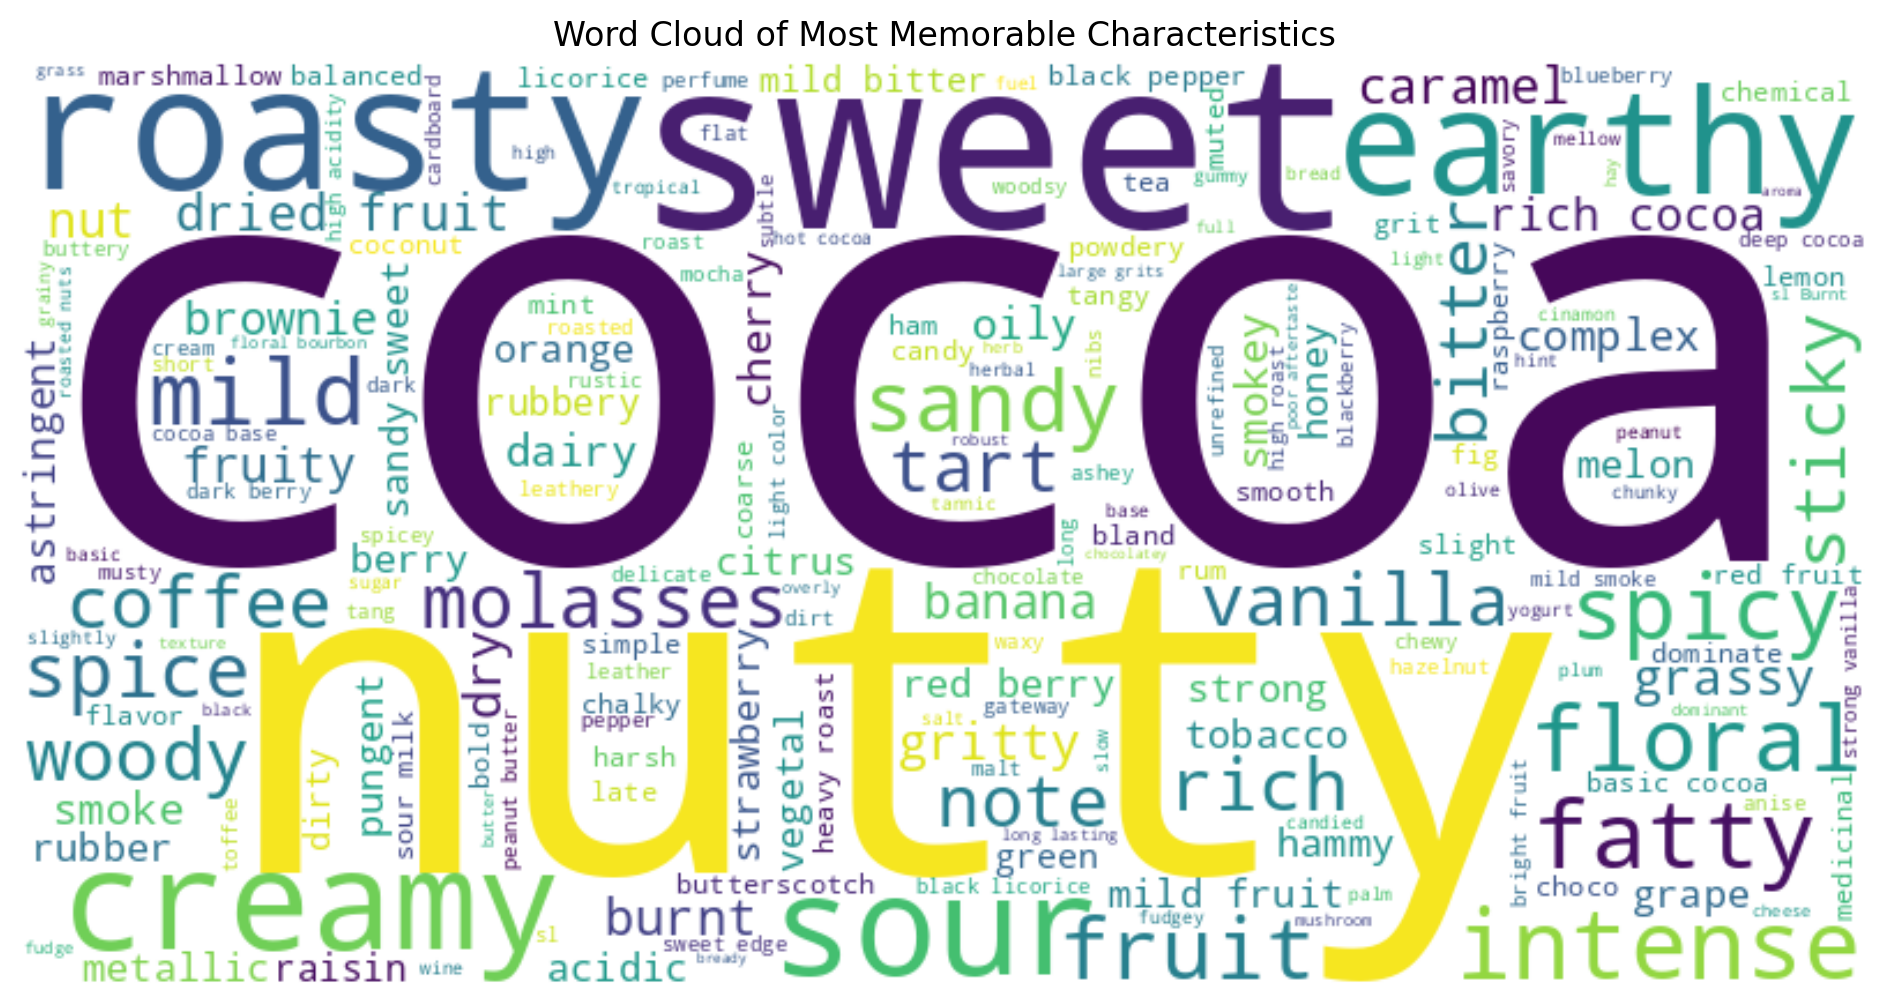

In [56]:
# 9. Text Analysis (Word Cloud)
text = ' '.join(df['most_memorable_characteristics'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Memorable Characteristics')
plt.axis('off')
plt.show()

## 2.1. Transform the data into a format suitable for Market Basket Analysis
### เปลี่ยนข้อมูลให้อยู่ในรูปแบบที่เหมาะสำหรับ Market Basket Analysis

In [57]:
df['ingredients']=df['ingredients'].str.replace('1-','')
df['ingredients']=df['ingredients'].str.replace('2-','')
df['ingredients']=df['ingredients'].str.replace('3-','')
df['ingredients']=df['ingredients'].str.replace('4-','')
df['ingredients']=df['ingredients'].str.replace('5-','')
df['ingredients']=df['ingredients'].str.replace('6-','') 
df.head(2)


,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"B,S,C","cocoa, vegetal, savory",3.50


In [58]:
df['ingredients'].unique().tolist()
# .tolist() เพื่อทำให้เป็น list() ไม่งั้นจะเป็น array ดูยาก

[' B,S,C',
 ' B,S,C,L',
 ' B,S',
 ' B,S,C,V',
 ' B,S,C,V,L',
 'B,S,C,V,L,Sa',
 'B,S,C,V,Sa',
 ' B,S,V,L',
 ' B,S*',
 ' B',
 ' B,S*,C',
 ' B,S,L',
 ' B,S,V',
 ' B,S*,C,L',
 ' B,S*,C,Sa',
 ' B,S*,Sa',
 ' B,S,C,Sa',
 ' B,S*,V,L',
 ' B,C',
 ' B,S*,C,V',
 ' B,S,C,L,Sa']

In [59]:
total_ingredients = ['Sa', 'L', 'S*', 'V', ' C', 'S', ' B', 'C']
    # 'Sa', 'L', 'S*', 'V', ' C', 'S', ' B', 'C'
    #'B', 'S', 'S*', 'C', 'V', 'L', 'Sa'

# Create binary columns for each ingredient
for ingredient in total_ingredients:
    df[ingredient.strip()] = df['ingredients'].apply\
    (lambda x: 1 if isinstance(x, str) and ingredient.strip() in x.split(',') else 0)

# Drop the original 'ingredients' column
df.drop('ingredients', axis=1, inplace=True)

In [60]:
df.head()


,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,most_memorable_characteristics,rating,Sa,L,S*,V,C,S,B
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"rich cocoa, fatty, bready",3.25,0,0,0,0,1,1,0
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"cocoa, vegetal, savory",3.50,0,0,0,0,1,1,0
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"cocoa, blackberry, full body",3.75,0,0,0,0,1,1,0
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"chewy, off, rubbery",3.00,0,0,0,0,1,1,0
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"fatty, earthy, moss, nutty,chalky",3.00,0,0,0,0,1,1,0


In [61]:
print( df[['Sa', 'L', 'S*', 'V', 'C', 'S', 'B', 'C']] )
basket = df[['Sa', 'L', 'S*', 'V', 'C', 'S', 'B', 'C']]

      Sa  L  S*  V  C  S  B  C
0      0  0   0  0  1  1  0  1
1      0  0   0  0  1  1  0  1
2      0  0   0  0  1  1  0  1
3      0  0   0  0  1  1  0  1
4      0  0   0  0  1  1  0  1
...   .. ..  .. .. .. .. .. ..
2525   1  0   1  0  1  0  0  1
2526   0  0   0  0  1  1  0  1
2527   0  0   0  0  1  1  0  1
2528   0  0   0  0  1  1  0  1
2529   0  0   0  0  1  1  0  1

[2443 rows x 8 columns]


# 2. Market Basket Analysis

https://www.youtube.com/watch?v=Abbj3VzNtXQ&t=27s

In [62]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
%config InlineBackend.figure_format='retina'

In [63]:
pd.Timestamp.now()

Timestamp('2024-02-16 15:17:44.303307')

In [64]:
basket.head()

,Sa,L,S*,V,C,S,B,C
0,0,0,0,0,1,1,0,1
1,0,0,0,0,1,1,0,1
2,0,0,0,0,1,1,0,1
3,0,0,0,0,1,1,0,1
4,0,0,0,0,1,1,0,1


In [65]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2443 entries, 0 to 2529
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sa      2443 non-null   int64
 1   L       2443 non-null   int64
 2   S*      2443 non-null   int64
 3   V       2443 non-null   int64
 4   C       2443 non-null   int64
 5   S       2443 non-null   int64
 6   B       2443 non-null   int64
 7   C       2443 non-null   int64
dtypes: int64(8)
memory usage: 236.3 KB


In [66]:
basket = basket.astype(pd.SparseDtype('bool'))
print( basket.head() )
print( basket.info() )

      Sa      L     S*      V     C     S      B     C
0  False  False  False  False  True  True  False  True
1  False  False  False  False  True  True  False  True
2  False  False  False  False  True  True  False  True
3  False  False  False  False  True  True  False  True
4  False  False  False  False  True  True  False  True
<class 'pandas.core.frame.DataFrame'>
Index: 2443 entries, 0 to 2529
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Sa      1 non-null      Sparse[bool, False]
 1   L       1 non-null      Sparse[bool, False]
 2   S*      1 non-null      Sparse[bool, False]
 3   V       1 non-null      Sparse[bool, False]
 4   C       1 non-null      Sparse[bool, False]
 5   S       1 non-null      Sparse[bool, False]
 6   B       1 non-null      Sparse[bool, False]
 7   C       1 non-null      Sparse[bool, False]
dtypes: Sparse[bool, False](8)
memory usage: 116.2 KB
None


## 2.2. สร้าง frequent_itemsets พร้อมระบุ min_support

In [67]:
frequent_itemsets = apriori(basket, min_support = 0.1, use_colnames = True)
#frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
3,0.966025,(S)
12,0.682767,(C)
2,0.682767,(C)
4,0.682767,(C)
11,0.665575,"(S, C)"
20,0.665575,"(S, C)"
13,0.665575,"(S, C)"
0,0.201801,(L)
6,0.199754,"(S, L)"
7,0.195252,"(C, L)"


## 2.3. สร้าง association rules

In [68]:
#metric = ['support', 'confidence', 'Life', 'Leverage', and 'conviction']

#rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
#rules = association_rulse(frequent_itemsets, metric= 'confidence',min_threshold= .5)
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1)

#rules.sort_values('lift',ascengind = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(C),(L),0.682767,0.201801,0.195252,0.285971,1.417095,0.057469,1.117881,0.927807
1,(L),(C),0.201801,0.682767,0.195252,0.967546,1.417095,0.057469,9.774739,0.368744
2,(S),(L),0.966025,0.201801,0.199754,0.206780,1.024671,0.004809,1.006276,0.708671
3,(L),(S),0.201801,0.966025,0.199754,0.989858,1.024671,0.004809,3.349898,0.030164
4,(C),(V),0.682767,0.144494,0.139992,0.205036,1.418988,0.041336,1.076156,0.930775
5,(V),(C),0.144494,0.682767,0.139992,0.968839,1.418988,0.041336,10.180292,0.345144
6,(S),(V),0.966025,0.144494,0.140401,0.145339,1.005845,0.000816,1.000988,0.171028
7,(V),(S),0.144494,0.966025,0.140401,0.971671,1.005845,0.000816,1.199304,0.006792
8,(S),(C),0.966025,0.682767,0.665575,0.688983,1.009104,0.006005,1.019986,0.265549
9,(C),(S),0.682767,0.966025,0.665575,0.974820,1.009104,0.006005,1.349278,0.028439


In [73]:
basket

,Sa,L,S*,V,C,S,B,C
0,False,False,False,False,True,True,False,True
1,False,False,False,False,True,True,False,True
2,False,False,False,False,True,True,False,True
3,False,False,False,False,True,True,False,True
4,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...
2525,True,False,True,False,True,False,False,True
2526,False,False,False,False,True,True,False,True
2527,False,False,False,False,True,True,False,True
2528,False,False,False,False,True,True,False,True


In [76]:
a='S'
b='C'
rules[(rules['antecedents']=={a}) & (rules['consequents']=={b})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(S),(C),0.966025,0.682767,0.665575,0.688983,1.009104,0.006005,1.019986,0.265549


In [78]:
rules[(rules['antecedents']=={b}) & (rules['consequents']=={a})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(C),(S),0.682767,0.966025,0.665575,0.97482,1.009104,0.006005,1.349278,0.028439


In [82]:
a='S'
b='C'
rules[((rules['antecedents']=={a}) & (rules['consequents']=={b})) |
     ((rules['antecedents']=={b}) & (rules['consequents']=={a}))] 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(S),(C),0.966025,0.682767,0.665575,0.688983,1.009104,0.006005,1.019986,0.265549
9,(C),(S),0.682767,0.966025,0.665575,0.974820,1.009104,0.006005,1.349278,0.028439


## 2.4. เข้าใจวิธีการคำนวนค่า support, confidence, lift

### 2.4.1. evaluation metrices

In [83]:
basket

,Sa,L,S*,V,C,S,B,C
0,False,False,False,False,True,True,False,True
1,False,False,False,False,True,True,False,True
2,False,False,False,False,True,True,False,True
3,False,False,False,False,True,True,False,True
4,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...
2525,True,False,True,False,True,False,False,True
2526,False,False,False,False,True,True,False,True
2527,False,False,False,False,True,True,False,True
2528,False,False,False,False,True,True,False,True


In [84]:
len(basket)

2443

### 2.4.2. support

In [85]:
basket.sum()

Sa    True
L     True
S*    True
V     True
C     True
S     True
B     True
C     True
dtype: Sparse[bool, False]

In [86]:
basket['S'].sum()

2360

In [87]:
basket['S'].sum()/len(basket)

0.9660253786328284

In [90]:
support=basket.sum()/len(basket)
support.sort_values(ascending=False)

Sa    0.000409
L     0.000409
S*    0.000409
V     0.000409
C     0.000409
S     0.000409
B     0.000409
C     0.000409
dtype: Sparse[float64, 0.0]

In [91]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(C),(L),0.682767,0.201801,0.195252,0.285971,1.417095,0.057469,1.117881,0.927807
1,(L),(C),0.201801,0.682767,0.195252,0.967546,1.417095,0.057469,9.774739,0.368744
2,(S),(L),0.966025,0.201801,0.199754,0.206780,1.024671,0.004809,1.006276,0.708671
3,(L),(S),0.201801,0.966025,0.199754,0.989858,1.024671,0.004809,3.349898,0.030164
4,(C),(V),0.682767,0.144494,0.139992,0.205036,1.418988,0.041336,1.076156,0.930775
5,(V),(C),0.144494,0.682767,0.139992,0.968839,1.418988,0.041336,10.180292,0.345144
6,(S),(V),0.966025,0.144494,0.140401,0.145339,1.005845,0.000816,1.000988,0.171028
7,(V),(S),0.144494,0.966025,0.140401,0.971671,1.005845,0.000816,1.199304,0.006792
8,(S),(C),0.966025,0.682767,0.665575,0.688983,1.009104,0.006005,1.019986,0.265549
9,(C),(S),0.682767,0.966025,0.665575,0.974820,1.009104,0.006005,1.349278,0.028439


### 2.4.3. confidence

### 2.4.4. lift(S -> C)

### 2.4.5. filter SET Column